In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [6]:
# Build the Sequential feedforward neural network model
model = Sequential([
     Flatten(input_shape = (28,28)),
     Dense(16, activation = "relu"),
     Dense(16, activation="relu"),
     Dense(10, activation="softmax")
])


In [7]:
# Print the model summary

model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.05025466, -0.0207837 , -0.06298387, ..., -0.03100187,
          0.08404948,  0.03033735],
        [-0.0389953 ,  0.02397779, -0.02428557, ..., -0.04340558,
         -0.01252683,  0.0701184 ],
        [ 0.08295391, -0.03114393, -0.08406872, ..., -0.0357069 ,
          0.06579848,  0.02252905],
        ...,
        [ 0.01422974, -0.04090094,  0.02063756, ..., -0.01177577,
         -0.07692546,  0.06515574],
        [-0.03422557, -0.0537113 , -0.04532356, ...,  0.06341343,
         -0.01974009,  0.04031235],
        [ 0.04238142, -0.03606697,  0.0021674 , ...,  0.06211889,
          0.0486315 , -0.00042691]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[-0.24347961, -0.07459885, -0.36246133,  0.005

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [66]:
# Build the Sequential convolutional neural network model
model = Sequential([
      Conv2D(filters=16, activation="relu", kernel_size=(3,3),input_shape = (28,28,1)),
      MaxPooling2D(pool_size=(3,3)),
      Flatten(),
      Dense(10, activation="softmax")  
])


In [67]:
# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [68]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer = opt,
    loss = "sparse_categorical_crossentropy",
    metrics = [acc,mae])

In [70]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [71]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [72]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [73]:
# Print the shape of the training data
train_images.shape, train_images[...,np.newaxis].shape


((60000, 28, 28), (60000, 28, 28, 1))

In [74]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [75]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.0
test_images = test_images / 255.0

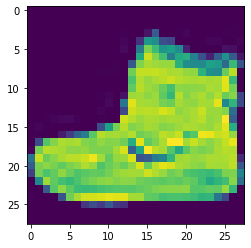

In [76]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()

#### Fit the model

In [79]:
# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels, epochs = 8, batch_size= 256)

Epoch 1/8
235/235 [==============================] - 13s 56ms/step - loss: 0.2979 - sparse_categorical_accuracy: 0.8928 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 13s 56ms/step - loss: 0.2895 - sparse_categorical_accuracy: 0.8965 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 13s 56ms/step - loss: 0.2829 - sparse_categorical_accuracy: 0.8983 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 13s 56ms/step - loss: 0.2772 - sparse_categorical_accuracy: 0.8990 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 13s 56ms/step - loss: 0.2705 - sparse_categorical_accuracy: 0.9017 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 13s 56ms/step - loss: 0.2676 - sparse_categorical_accuracy: 0.9036 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 13s 56ms/step - loss: 0.2635 - sparse_categoric

#### Plot training history

In [80]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.297900,0.892783,4.420001
1,0.289489,0.896517,4.420000
2,0.282872,0.898317,4.420000
3,0.277195,0.899050,4.420000
4,0.270454,0.901717,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

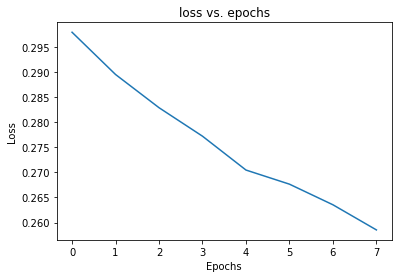

In [81]:
# Make a plot for the loss
loss_plot = df.plot(y = "loss", title = "loss vs. epochs", legend = False)
loss_plot.set(xlabel = "Epochs", ylabel = "Loss")

[Text(0, 0.5, 'sparse_categorical_accuracy'), Text(0.5, 0, 'Epochs')]

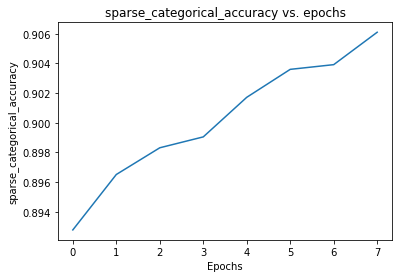

In [86]:
# Make a plot for the accuracy

loss_plot = df.plot(y = "sparse_categorical_accuracy", title = "sparse_categorical_accuracy vs. epochs", legend = False)
loss_plot.set(xlabel = "Epochs", ylabel = "sparse_categorical_accuracy")

In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [82]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose = 2 )


313/313 - 2s - loss: 0.3186 - sparse_categorical_accuracy: 0.8879 - mean_absolute_error: 4.4200


#### Make predictions from the model

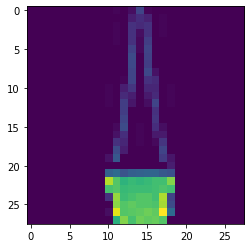

Label: Bag


In [83]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [85]:
# Get the model predictions
model.predict(test_image[np.newaxis,...,np.newaxis])


array([[9.2223717e-04, 2.8315280e-04, 3.2446031e-05, 1.2932470e-03,
        1.1135304e-06, 9.2647249e-01, 5.9028207e-05, 2.5358399e-06,
        7.0913762e-02, 1.9956373e-05]], dtype=float32)